Getting the data ready to begin the analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Reading The Data

In [3]:
slr_df=pd.read_csv("2_Marks_Data.csv")
print("Columns in the dataset:\n",slr_df.columns)
slr_df.head()


Columns in the dataset:
 Index(['Hours', 'Marks', 'Unnamed: 2'], dtype='object')


,Hours,Marks,Unnamed: 2
0,1.1,32,NaN
1,1.3,37,NaN
2,1.5,30,NaN
3,2.0,35,NaN
4,2.2,32,NaN


In [4]:
slr_df.shape

(30, 3)

In [5]:
slr_df.describe()

,Hours,Marks,Unnamed: 2
count,30.000000,30.000000,0.0
mean,5.313333,60.966667,NaN
std,2.837888,21.945832,NaN
min,1.100000,30.000000,NaN
25%,3.200000,45.250000,NaN
50%,4.700000,52.500000,NaN
75%,7.700000,80.500000,NaN
max,10.500000,98.000000,NaN


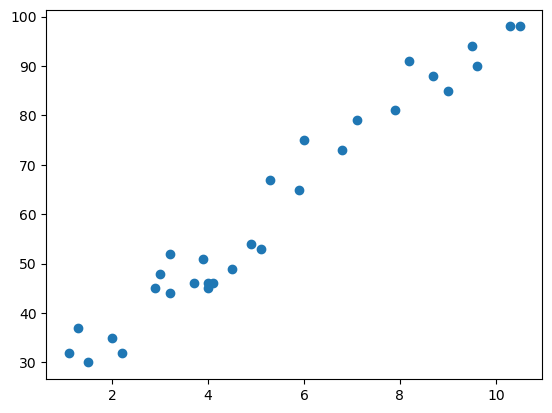

In [6]:
plt.scatter(slr_df['Hours'],slr_df['Marks'])

Preparing the data

In [7]:
X=slr_df.iloc[:,:1]
y=slr_df.iloc[:,1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Train the Algorithm

In [8]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

Intercept and Coefficient values

In [9]:
print("Intercept value: ",regressor.intercept_)
print("Coefficeint value: ",regressor.coef_)

Intercept value:  21.591687397862003
Coefficeint value:  [7.44480645]


Making Prediction

In [10]:
y_pred=regressor.predict(X_test)
output_df=pd.DataFrame({'Actual': y_test,'Predict':y_pred})
print("Actual vs Predicted:\n",output_df)

Actual vs Predicted:
     Actual    Predict
2       30  32.758897
28      98  98.273194
13      46  52.115394
10      51  50.626433
26      94  92.317349
24      88  86.361503


Plotting Graphs

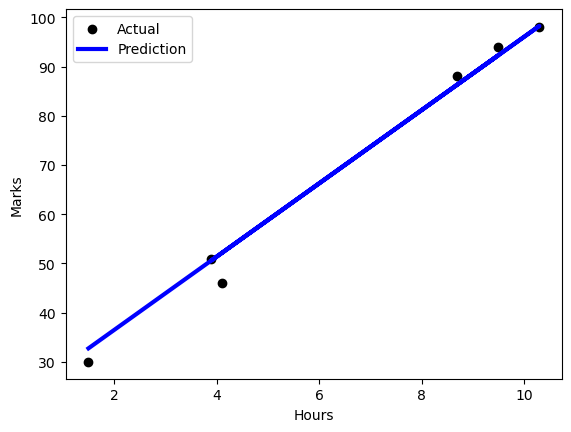

In [11]:
plt.scatter(X_test,y_test,color='black',label="Actual")
plt.plot(X_test,y_pred,color='blue',linewidth=3,label="Prediction")
plt.xlabel("Hours")
plt.ylabel("Marks")
plt.legend()

Evaluating the model

In [12]:
import numpy as np
from sklearn import metrics
explained_variance=metrics.explained_variance_score(y_test,y_pred)
msle=metrics.mean_squared_log_error(y_test,y_pred)
mae=metrics.mean_absolute_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
meae=metrics.median_absolute_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
print("Explained Variance: ",explained_variance)
print("Mean Squared Log Error: ",msle)
print("Mean Absolute Error: ",mae)
print("Mean Squared Error: ",round(mse,2))
print("Median Absolute Error: ",meae)
print("R-Squared: ",round(r2,4))
print("Root Mean Squared Error: ",np.sqrt(mse))

Explained Variance:  0.9890803482625947
Mean Squared Log Error:  0.003825821120738591
Mean Absolute Error:  2.1403666732590145
Mean Squared Error:  8.46
Median Absolute Error:  1.6605739505157686
R-Squared:  0.9879
Root Mean Squared Error:  2.9080270701338806


In [13]:
from statsmodels.api import OLS
import statsmodels.api as sm
X=sm.add_constant(X)
summ=OLS(y,X).fit().summary()
print("Summary of the dataset:\n",summ)

Summary of the dataset:
                             OLS Regression Results                            
Dep. Variable:                  Marks   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     632.4
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           9.25e-21
Time:                        23:05:50   Log-Likelihood:                -87.307
No. Observations:                  30   AIC:                             178.6
Df Residuals:                      28   BIC:                             181.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.7583      